<a href="https://colab.research.google.com/github/bernardopaes/Analise_dados_python_e_pandas/blob/main/3_Manipulacao_e_Visualizacao_de_Dados.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Trabalhando com Planilhas do Excel**

In [84]:
# Importando a biblioteca
import pandas as pd

In [85]:
# Leitura dos arquivos
df1 = pd.read_excel("Aracaju.xlsx")
df2 = pd.read_excel("Fortaleza.xlsx")
df3 = pd.read_excel("Natal.xlsx")
df4 = pd.read_excel("Recife.xlsx")
df5 = pd.read_excel("Salvador.xlsx")

In [86]:
df1.head()

,Cidade,Data,Vendas,LojaID,Qtde
0,Aracaju,2018-01-01,142.00,1520,1
1,Aracaju,2018-01-01,14.21,1522,6
2,Aracaju,2018-01-01,71.55,1520,1
3,Aracaju,2018-01-01,3.01,1521,7
4,Aracaju,2018-01-01,24.51,1522,8


In [87]:
# Juntando todos os arquivos
df = pd.concat([df1,df2,df3,df4,df5])

In [88]:
# Exibindo as 5 primeiras linhas
df.head()

,Cidade,Data,Vendas,LojaID,Qtde
0,Aracaju,2018-01-01,142.00,1520,1
1,Aracaju,2018-01-01,14.21,1522,6
2,Aracaju,2018-01-01,71.55,1520,1
3,Aracaju,2018-01-01,3.01,1521,7
4,Aracaju,2018-01-01,24.51,1522,8


In [89]:
# Exibindo as 5 últimas linhas
df.tail()

,Cidade,Data,Vendas,LojaID,Qtde
235,Salvador,2019-01-03,41.84,1034,1
236,Salvador,2019-01-03,126.29,1035,3
237,Salvador,2019-01-03,38.06,1036,3
238,Salvador,2019-01-03,139.64,1035,1
239,Salvador,2019-01-03,161.41,1037,3


In [90]:
# Obtendo uma amostra do conjunto de dados
df.sample(5)

,Cidade,Data,Vendas,LojaID,Qtde
51,Fortaleza,2019-01-01,30.47,1005,3
113,Natal,2019-01-02,18.90,1034,3
58,Recife,2019-01-01,8.02,983,2
49,Fortaleza,2019-01-01,183.33,1002,6
39,Recife,2019-01-01,143.58,981,3


In [91]:
# Verificandoo tipo de dado de cada coluna
df.dtypes

Cidade            object
Data      datetime64[ns]
Vendas           float64
LojaID             int64
Qtde               int64
dtype: object

In [92]:
# Alterando o tipo de dado da coluna LojaID
df["LojaID"] = df["LojaID"].astype("object")

In [93]:
df.dtypes

Cidade            object
Data      datetime64[ns]
Vendas           float64
LojaID            object
Qtde               int64
dtype: object

In [94]:
df.head()

,Cidade,Data,Vendas,LojaID,Qtde
0,Aracaju,2018-01-01,142.00,1520,1
1,Aracaju,2018-01-01,14.21,1522,6
2,Aracaju,2018-01-01,71.55,1520,1
3,Aracaju,2018-01-01,3.01,1521,7
4,Aracaju,2018-01-01,24.51,1522,8


## **Tratando valores faltantes**

In [95]:
# Consultando linhas com valores faltantes
df.isnull().sum()

Cidade    0
Data      0
Vendas    0
LojaID    0
Qtde      0
dtype: int64

In [96]:
df["Vendas"].mean()

122.61180089485458

In [97]:
# Substituindo os valores nulos pela média
df["Vendas"].fillna(df["Vendas"].mean(), inplace=True)

In [98]:
df.isnull().sum()

Cidade    0
Data      0
Vendas    0
LojaID    0
Qtde      0
dtype: int64

In [99]:
df.sample(10)


,Cidade,Data,Vendas,LojaID,Qtde
104,Natal,2019-01-02,188.79,1036,3
139,Natal,2019-01-02,169.01,1036,1
63,Recife,2019-01-01,37.95,980,2
134,Salvador,2019-03-02,125.90,1036,1
99,Fortaleza,2019-01-01,9.01,1002,3
28,Fortaleza,2019-01-01,34.88,1004,3
40,Natal,2018-01-10,885.00,853,3
65,Recife,2019-01-01,4.01,981,1
85,Aracaju,2018-01-01,15.17,1521,1
122,Aracaju,2018-01-01,38.49,1522,4


In [100]:
# Substituindo os valores nulos por zero
df["Vendas"].fillna(0, inplace=True)

In [101]:
# Apagando as linhas com valores nulos
df.dropna(inplace=True)

In [102]:
# Apagando as linhas com os valores nulos com base apenas em uma coluna
df.dropna(subset=["Vendas"], inplace=True)

In [103]:
# Removendo linhas que estejam com valores faltantes em todas as colunas
df.dropna(how="all", inplace=True)

## **Criando colunas novas**

In [104]:
# Criando a coluna de receita
df["Receita"] = df["Vendas"].mul(df["Qtde"])

In [105]:
df.head()

,Cidade,Data,Vendas,LojaID,Qtde,Receita
0,Aracaju,2018-01-01,142.00,1520,1,142.00
1,Aracaju,2018-01-01,14.21,1522,6,85.26
2,Aracaju,2018-01-01,71.55,1520,1,71.55
3,Aracaju,2018-01-01,3.01,1521,7,21.07
4,Aracaju,2018-01-01,24.51,1522,8,196.08


In [106]:
df["Receita/Vendas"] = df["Receita"] / df["Vendas"]

In [107]:
# Retornando a maior receita
df["Receita"].max()

3544.0

In [108]:
# Retornando a menor receita
df["Receita"].min()

3.34

In [109]:
# Descobrindo a 3 maiores receitas (nlargest)
df.nlargest(3, "Receita")

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Receita/Vendas
7,Natal,2019-03-18,886.0,853,4,3544.0,4.0
51,Natal,2018-01-21,859.0,852,4,3436.0,4.0
55,Natal,2019-01-08,859.0,854,4,3436.0,4.0


In [110]:
# Descobrindo a 3 menores receitas (nsmallest)
df.nsmallest(3, "Receita")

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Receita/Vendas
118,Aracaju,2018-01-01,3.34,1522,1,3.34,1.0
65,Recife,2019-01-01,4.01,981,1,4.01,1.0
92,Natal,2019-01-02,4.57,1035,1,4.57,1.0


In [111]:
# Agrupamento por cidade
df.groupby("Cidade")["Receita"].sum()

Cidade
Aracaju       48748.25
Fortaleza     37913.97
Natal        167227.52
Recife        51936.51
Salvador      40596.73
Name: Receita, dtype: float64

In [112]:
# Ordenando o conjunto de dados
df.sort_values("Receita", ascending=False).head(10)

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Receita/Vendas
7,Natal,2019-03-18,886.0,853,4,3544.0,4.0
55,Natal,2019-01-08,859.0,854,4,3436.0,4.0
51,Natal,2018-01-21,859.0,852,4,3436.0,4.0
30,Natal,2018-10-02,856.0,853,4,3424.0,4.0
41,Natal,2018-05-20,835.0,852,4,3340.0,4.0
38,Natal,2018-02-25,828.0,852,4,3312.0,4.0
10,Natal,2018-10-27,828.0,852,4,3312.0,4.0
69,Natal,2019-03-24,817.0,852,4,3268.0,4.0
62,Natal,2018-02-10,793.0,854,4,3172.0,4.0
52,Natal,2018-04-27,778.0,854,4,3112.0,4.0


## **Trabalhando com datas**

In [113]:
# Transformando a coluna Data em um tipo inteiro
df["Data"] = df["Data"].astype("int64")

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: casting datetime64[ns] values to int64 with .astype(...) is deprecated and will raise in a future version. Use .view(...) instead.
  


In [114]:
# Verificando o tipo de dados de cada coluna
df.dtypes

Cidade             object
Data                int64
Vendas            float64
LojaID             object
Qtde                int64
Receita           float64
Receita/Vendas    float64
dtype: object

In [115]:
# Transformando a coluna Data em um tipo data
df["Data"] = pd.to_datetime(df["Data"])

In [116]:
df.dtypes

Cidade                    object
Data              datetime64[ns]
Vendas                   float64
LojaID                    object
Qtde                       int64
Receita                  float64
Receita/Vendas           float64
dtype: object

In [117]:
# Agrupamento por ano
df.groupby(df["Data"].dt.year)["Receita"].sum()

Data
2018    118176.53
2019    228246.45
Name: Receita, dtype: float64

In [118]:
# Criando uma nova coluna com o ano
df["Ano Venda"] = df["Data"].dt.year

In [119]:
df.sample(5)

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Receita/Vendas,Ano Venda
236,Salvador,2019-01-03,126.29,1035,3,378.87,3.0,2019
21,Salvador,2019-01-01,39.72,1035,3,119.16,3.0,2019
27,Natal,2018-07-16,390.00,853,3,1170.00,3.0,2018
18,Fortaleza,2019-01-01,38.31,1002,3,114.93,3.0,2019
4,Fortaleza,2019-01-01,14.25,1004,6,85.50,6.0,2019


In [120]:
# Extraindo o mês e o dia
df["Mes_Venda"], df["Dia_Venda"] = (df["Data"].dt.month, df["Data"].dt.day)

In [121]:
df.sample(5)

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Receita/Vendas,Ano Venda,Mes_Venda,Dia_Venda
102,Natal,2019-01-02,40.84,1034,3,122.52,3.0,2019,1,2
65,Recife,2019-01-01,4.01,981,1,4.01,1.0,2019,1,1
224,Salvador,2019-01-02,178.30,1035,3,534.90,3.0,2019,1,2
78,Recife,2019-01-01,238.73,980,3,716.19,3.0,2019,1,1
18,Aracaju,2018-01-01,32.14,1522,6,192.84,6.0,2018,1,1


In [122]:
# Retornando a data mais antiga
df["Data"].min()

Timestamp('2018-01-01 00:00:00')

In [123]:
# Calculando a diferença de dias
df["Diferenca Dias"] = df["Data"] - df["Data"].min()

In [124]:
df.sample(5)

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Receita/Vendas,Ano Venda,Mes_Venda,Dia_Venda,Diferenca Dias
43,Natal,2019-04-01,538.00,853,3,1614.00,3.0,2019,4,1,455 days
117,Recife,2019-03-02,15.42,983,8,123.36,8.0,2019,3,2,425 days
103,Recife,2019-01-01,41.65,982,3,124.95,3.0,2019,1,1,365 days
79,Aracaju,2018-01-01,5.59,1521,4,22.36,4.0,2018,1,1,0 days
207,Natal,2019-01-02,46.70,1036,2,93.40,2.0,2019,1,2,366 days


In [125]:
# Criando a coluna de trimestre
df["Trimestre Vendas"] = df["Data"].dt.quarter

In [126]:
df.sample(5)

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Receita/Vendas,Ano Venda,Mes_Venda,Dia_Venda,Diferenca Dias,Trimestre Vendas
119,Recife,2019-03-02,152.30,982,7,1066.10,7.0,2019,3,2,425 days,1
27,Recife,2019-01-01,22.25,980,7,155.75,7.0,2019,1,1,365 days,1
107,Aracaju,2018-01-01,142.57,1523,3,427.71,3.0,2018,1,1,0 days,1
19,Salvador,2019-01-01,167.12,1035,1,167.12,1.0,2019,1,1,365 days,1
4,Natal,2019-03-09,699.00,853,3,2097.00,3.0,2019,3,9,432 days,1


In [127]:
# Filtrando as vendas de 2019 do mês de março
vendas_marco_19 = df.loc[(df["Data"].dt.year == 2019) & (df["Data"].dt.month == 3)]

In [128]:
vendas_marco_19.sample(20)

,Cidade,Data,Vendas,LojaID,Qtde,Receita,Receita/Vendas,Ano Venda,Mes_Venda,Dia_Venda,Diferenca Dias,Trimestre Vendas
109,Salvador,2019-03-02,124.37,1035,1,124.37,1.0,2019,3,2,425 days,1
140,Salvador,2019-03-02,20.79,1036,2,41.58,2.0,2019,3,2,425 days,1
130,Fortaleza,2019-03-02,12.36,983,4,49.44,4.0,2019,3,2,425 days,1
137,Fortaleza,2019-03-02,51.99,983,3,155.97,3.0,2019,3,2,425 days,1
32,Natal,2019-03-17,244.00,854,2,488.00,2.0,2019,3,17,440 days,1
134,Fortaleza,2019-03-02,195.18,980,5,975.90,5.0,2019,3,2,425 days,1
133,Fortaleza,2019-03-02,14.67,980,7,102.69,7.0,2019,3,2,425 days,1
111,Recife,2019-03-02,8.00,981,3,24.00,3.0,2019,3,2,425 days,1
140,Recife,2019-03-02,166.89,983,5,834.45,5.0,2019,3,2,425 days,1
134,Recife,2019-03-02,195.18,980,5,975.90,5.0,2019,3,2,425 days,1


## **Visualização de Dados**

In [129]:
df["LojaID"].value_counts(ascending=False)

1036    117
1035    112
1037    101
1034     67
983      65
982      44
1522     41
1520     39
980      36
981      31
1005     30
1002     30
852      29
1523     29
1004     28
854      28
853      26
1521     21
1003     20
Name: LojaID, dtype: int64

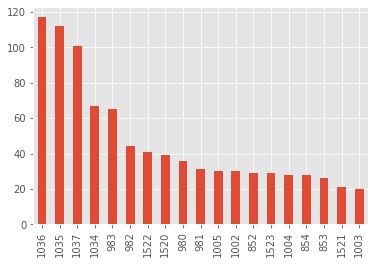

In [130]:
# Gráfico de barras
df["LojaID"].value_counts(ascending=False).plot.bar()

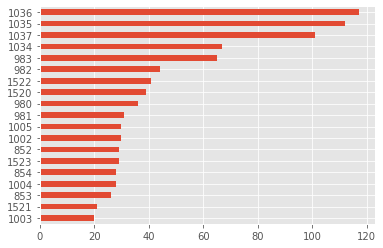

In [131]:
# Gráfico de barras horizontais
df["LojaID"].value_counts(ascending=True).plot.barh();  # O ; elimina a linha acima do gráfico

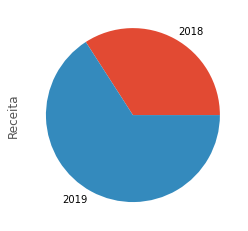

In [132]:
# Gráfico de pizza
df.groupby(df["Data"].dt.year)["Receita"].sum().plot.pie();

In [133]:
df["Cidade"].value_counts()

Natal        240
Salvador     240
Fortaleza    142
Recife       142
Aracaju      130
Name: Cidade, dtype: int64

TypeError: ignored

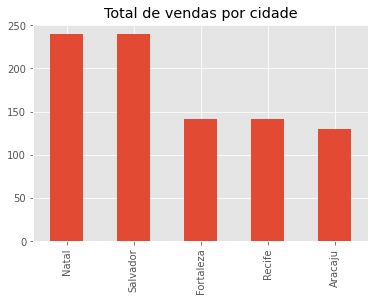

In [134]:
# Adicionando um título e alterando o nome dos eixos
import matplotlib.pyplot as plt
df["Cidade"].value_counts().plot.bar(title="Total de vendas por cidade")
plt.xlabel("Cidade")
plt.ylabel("Total de vendas");

TypeError: ignored

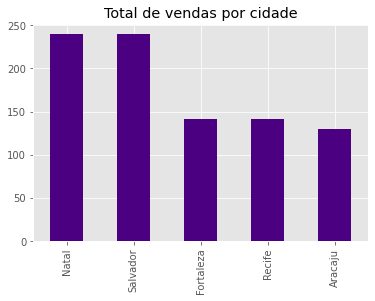

In [135]:
# Alterando a cor
df["Cidade"].value_counts().plot.bar(title="Total de vendas por cidade", color="indigo")
plt.xlabel("Cidade")
plt.ylabel("Total de vendas");

In [136]:
# Alterando o estilo
plt.style.use("ggplot")

TypeError: ignored

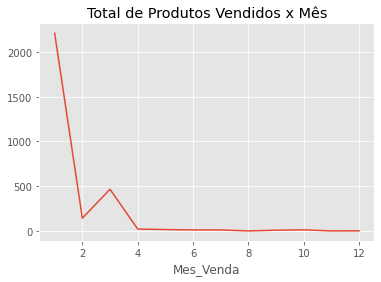

In [140]:
df.groupby(df["Mes_Venda"])["Qtde"].sum().plot(title="Total de Produtos Vendidos x Mês") # O .plot sozinho mostra o gráfico por linhas
plt.xlabel("Mês")
plt.ylabel("Total de produtos vendidos")
plt.legend();

In [141]:
df.groupby(df["Mes_Venda"])["Qtde"].sum()

Mes_Venda
1     2208
2      144
3      467
4       23
5       17
6       13
7       13
8        2
9       10
10      14
11       2
12       3
Name: Qtde, dtype: int64

In [142]:
# Selecionando apenas as vendas de 2019
df_2019 = df[df["Ano Venda"] == 2019]

In [143]:
df_2019.groupby(df_2019["Mes_Venda"])["Qtde"].sum()

Mes_Venda
1    1541
2     128
3     460
4      12
Name: Qtde, dtype: int64

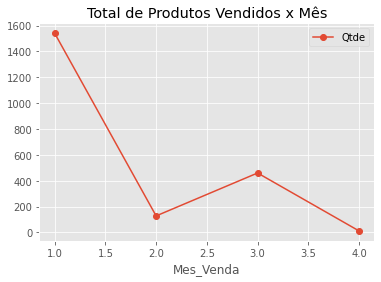

In [144]:
# Total de produtos vendidos por mês
df_2019.groupby(df_2019["Mes_Venda"])["Qtde"].sum().plot(marker="o", title="Total de Produtos Vendidos x Mês")
plt.xlabel = "Mês"
plt.ylabel = "Total de produtos vendidos"
plt.legend();

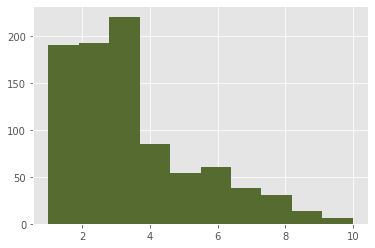

In [145]:
# Histograma
plt.hist(df["Qtde"], color="darkolivegreen");

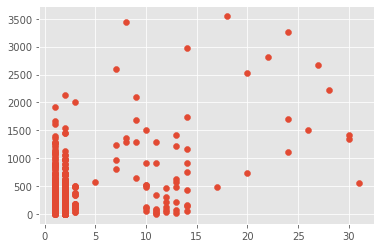

In [146]:
# Gráfico de dispersão
plt.scatter(x = df_2019["Dia_Venda"], y = df_2019["Receita"]);

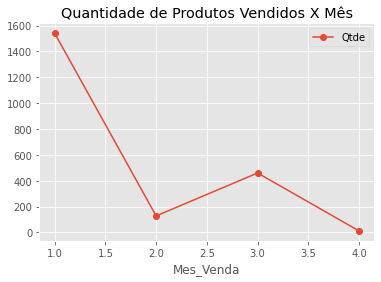

In [138]:
# Salvando em png
df_2019.groupby(df_2019["Mes_Venda"])["Qtde"].sum().plot(marker = "o")
plt.title("Quantidade de Produtos Vendidos X Mês")
plt.xlabel = "Mês"
plt.ylabel = "Total de produtos vendidos"
plt.legend();
plt.savefig("grafico qtde x mes.png")